<a href="https://colab.research.google.com/github/EunSu0/github/blob/main/corona_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

In [2]:
# simplernn은 가장 기본적인 순환 신경망
# minmaxscaler 데이터를 정규화하기 위한 방법
# mean_squared_error 결과의 정확도를 계산하기 위한 함수
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

In [3]:
!git clone https://github.com/yhlee1627/deeplearning.git
dataframe = read_csv('/content/deeplearning/corona_daily.csv', usecols=[3], engine='python', skipfooter=3)
print(dataframe)
dataset = dataframe.values
dataset = dataset.astype('float32')

Cloning into 'deeplearning'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), 3.03 KiB | 3.03 MiB/s, done.
     Confirmed
0           24
1           24
2           27
3           27
4           28
..         ...
107      11190
108      11206
109      11225
110      11265
111      11344

[112 rows x 1 columns]


In [4]:
# 데이터 정규화 및 분류하기
# 분류할데이터(Dataset), 검증 데이터 비율(test_size=0.2), 추출하는 방법(shuffle=False)
# 훈련데이터와 검증데이터 개수 출력
scaler = MinMaxScaler(feature_range=(0, 1))
Dataset = scaler.fit_transform(dataset)
train_data, test_data = train_test_split(Dataset, test_size=0.2, shuffle=False)
print(len(train_data), len(test_data))

89 23


In [5]:
# 데이터 형태 변경하기
def create_dataset(dataset, look_back):
  x_data = []
  y_data = []
  for i in range(len(dataset) - look_back):
    data = dataset[i:(i+look_back), 0]
    x_data.append(data)
    y_data.append(dataset[i + look_back, 0])
  return np.array(x_data), np.array(y_data)

In [6]:
look_back = 3
x_train, y_train = create_dataset(train_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(86, 3) (86,)
(20, 3) (20,)


In [7]:
# 인공지능 모델에 넣어줄 형태로 변환하기
X_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
X_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
print(X_train.shape)
print(X_test.shape)

(86, 1, 3)
(20, 1, 3)


In [8]:
# 인공지능 모델 만들기
# 시퀀셜 모델
# mse(평균제곱오차)
model = Sequential()
model.add(SimpleRNN(3, input_shape=(1, look_back)))
model.add(Dense(1, activation="linear"))
model.compile(loss='mse', optimizer='adam')
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f2074e7fc10>>

In [9]:
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
86/86 [==============================] - 1s 3ms/step - loss: 0.0207
Epoch 2/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 3/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 4/100
86/86 [==============================] - 0s 2ms/step - loss: 6.3995e-04
Epoch 5/100
86/86 [==============================] - 0s 2ms/step - loss: 4.9792e-04
Epoch 6/100
86/86 [==============================] - 0s 2ms/step - loss: 4.5348e-04
Epoch 7/100
86/86 [==============================] - 0s 2ms/step - loss: 4.4018e-04
Epoch 8/100
86/86 [==============================] - 0s 2ms/step - loss: 4.6247e-04
Epoch 9/100
86/86 [==============================] - 0s 2ms/step - loss: 4.4352e-04
Epoch 10/100
86/86 [==============================] - 0s 2ms/step - loss: 4.4895e-04
Epoch 11/100
86/86 [==============================] - 0s 2ms/step - loss: 4.5994e-04
Epoch 12/100
86/86 [==============================] - 0s 2ms/step - loss: 4.5687e-04
E

In [10]:
# 데이터 예측하기
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
TrainPredict = scaler.inverse_transform(trainPredict)
Y_train = scaler.inverse_transform([y_train])
TestPredict = scaler.inverse_transform(testPredict)
Y_test = scaler.inverse_transform([y_test])
print(trainPredict)

1/1 [==============================] - 0s 14ms/step
[[0.01441266]
 [0.01471092]
 [0.01465008]
 [0.0147495 ]
 [0.01471953]
 [0.01471953]
 [0.01471953]
 [0.0147486 ]
 [0.01487709]
 [0.01497561]
 [0.01562654]
 [0.01912603]
 [0.02670403]
 [0.04171737]
 [0.0663973 ]
 [0.08304144]
 [0.10509701]
 [0.12070946]
 [0.1591122 ]
 [0.21680108]
 [0.28075248]
 [0.35885316]
 [0.40447447]
 [0.44886157]
 [0.50460607]
 [0.54647154]
 [0.5849352 ]
 [0.63061047]
 [0.66758144]
 [0.692317  ]
 [0.70701444]
 [0.71752244]
 [0.7365285 ]
 [0.7425985 ]
 [0.75115544]
 [0.7588089 ]
 [0.7640311 ]
 [0.76999485]
 [0.77694994]
 [0.78565705]
 [0.79715204]
 [0.80369824]
 [0.81502295]
 [0.8206033 ]
 [0.8249328 ]
 [0.8313616 ]
 [0.839348  ]
 [0.8468001 ]
 [0.854339  ]
 [0.86517507]
 [0.87133723]
 [0.8773421 ]
 [0.88665426]
 [0.8930537 ]
 [0.89899135]
 [0.90508056]
 [0.91147876]
 [0.91612947]
 [0.9187042 ]
 [0.92203516]
 [0.9254836 ]
 [0.9276336 ]
 [0.929297  ]
 [0.9314219 ]
 [0.93348306]
 [0.93507564]
 [0.93692863]
 [0.938644

In [11]:
# 모델의 정확도 살펴보기
trainScore = math.sqrt(mean_squared_error(Y_train[0], TrainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_test[0], TestPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 195.55 RMSE
Test Score: 110.01 RMSE


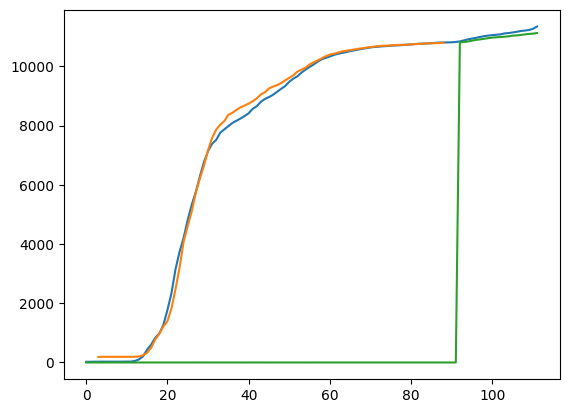

In [12]:
# 결과를 그래프로 확인하기
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(TrainPredict)+look_back, :] = TrainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[len(TrainPredict)+(look_back)*2:len(dataset), :] = TestPredict
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()